In [1]:
import scanpy as sc

In [2]:
adata=sc.read("data/adata_aligned.h5ad")

saving figure to file ./figures/scvelo_leiden.pdf


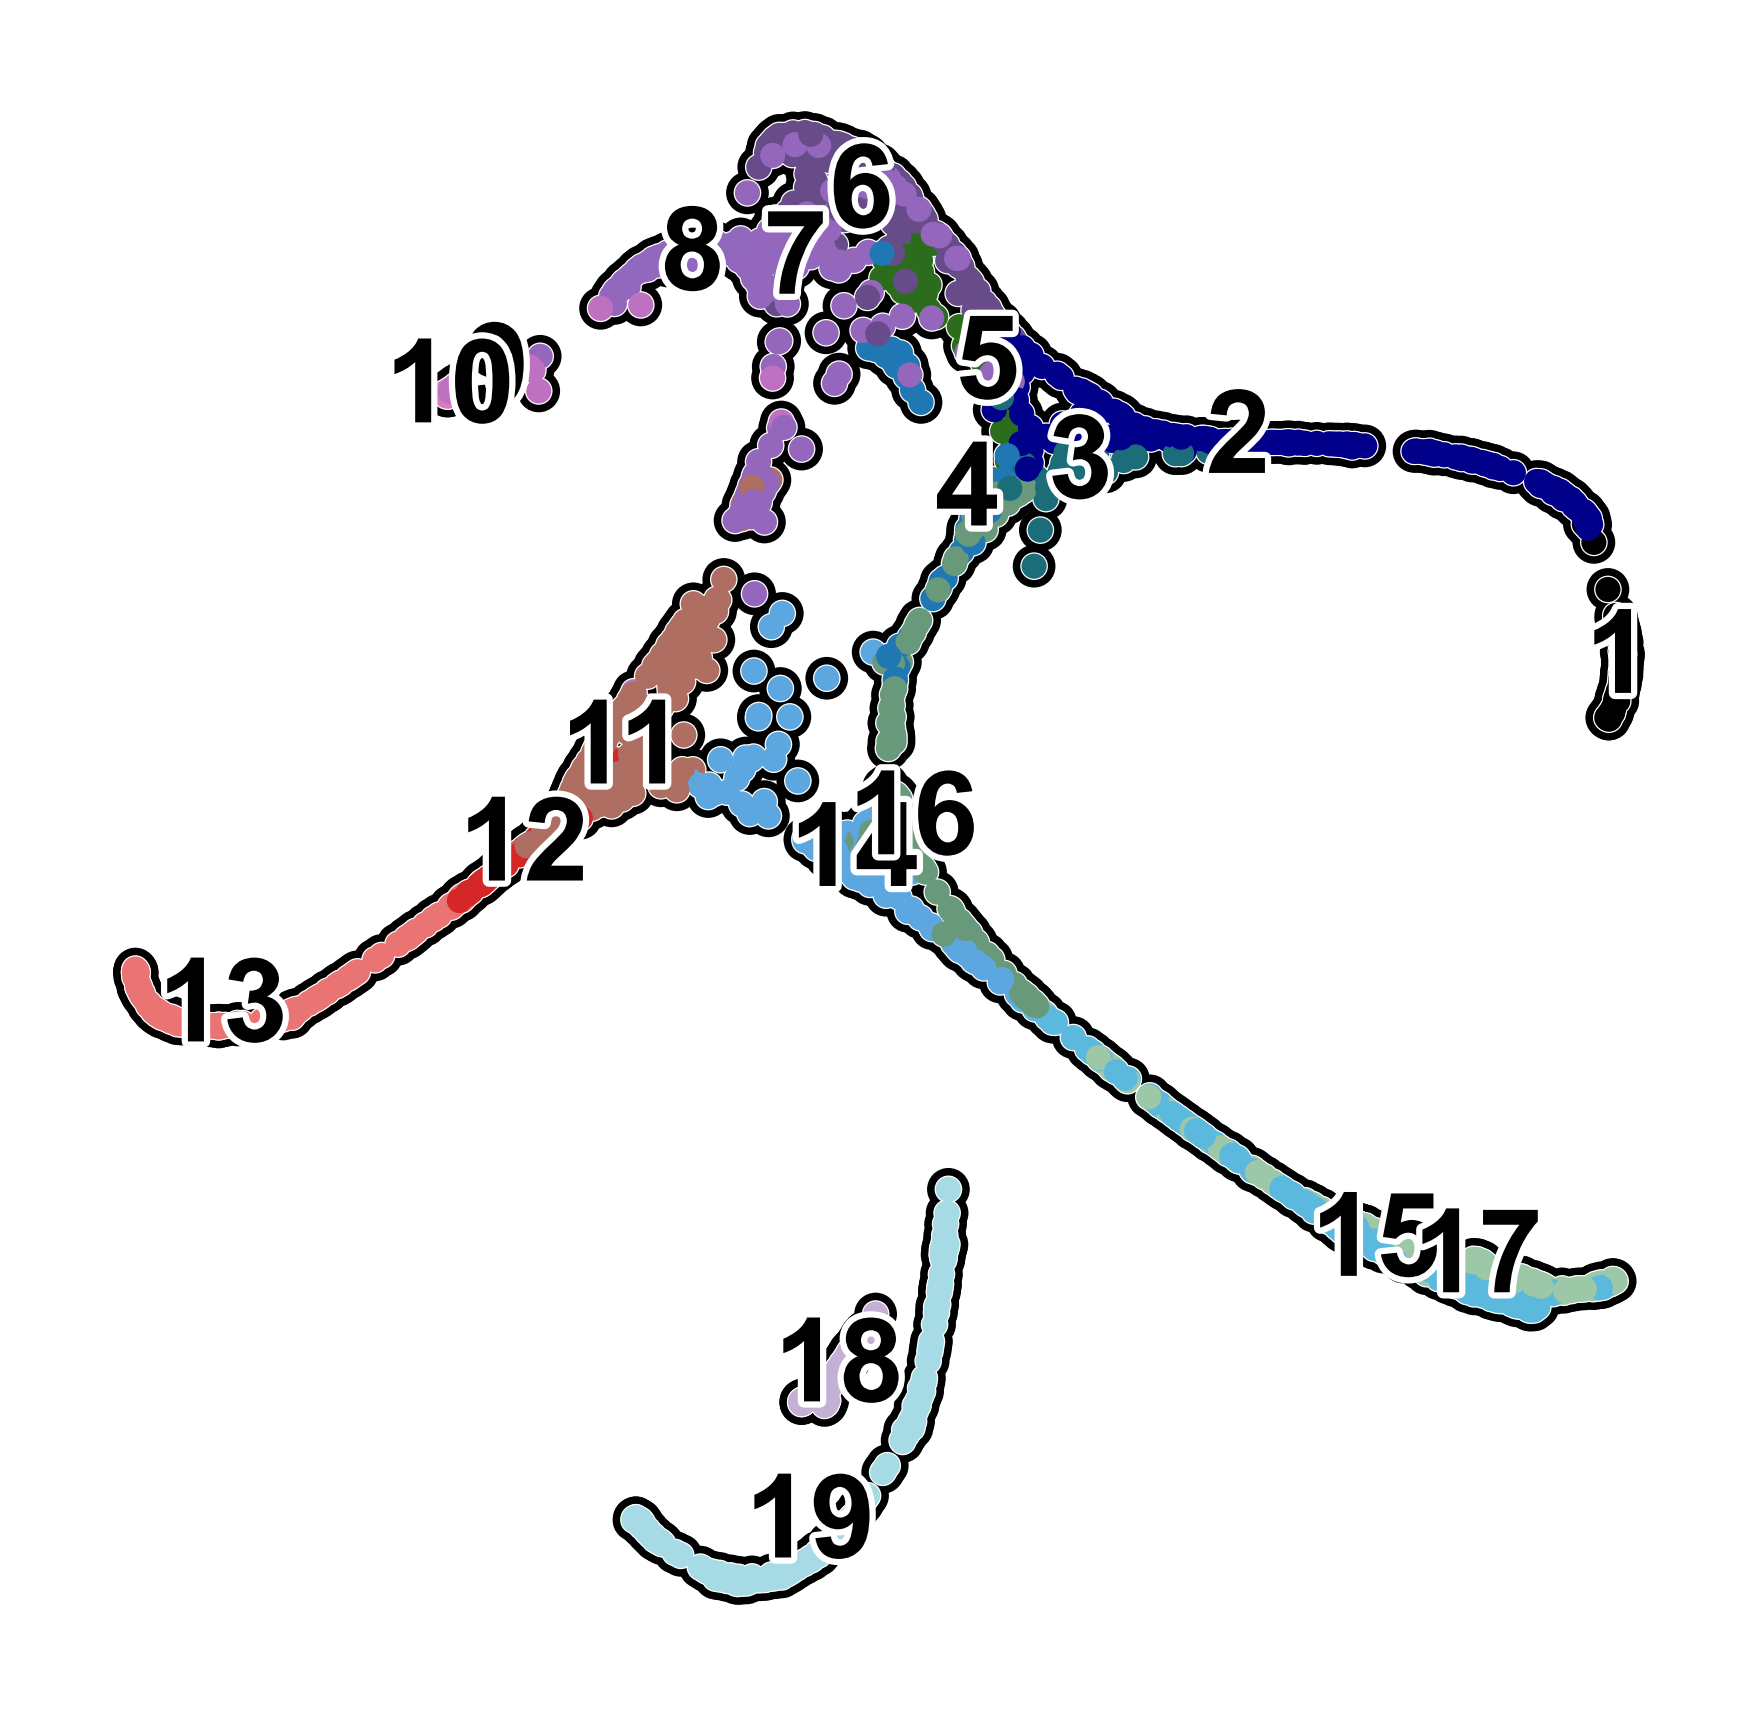

In [3]:
import scvelo as scv
scv.set_figure_params(figsize=(3.5,3.5))
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42
scv.pl.draw_graph(adata,color="leiden",add_outline=True,title="",dpi=300,
                 legend_fontsize=14, legend_fontoutline=1.5,save="leiden.pdf")

saving figure to file ./figures/scvelo_devtime.pdf


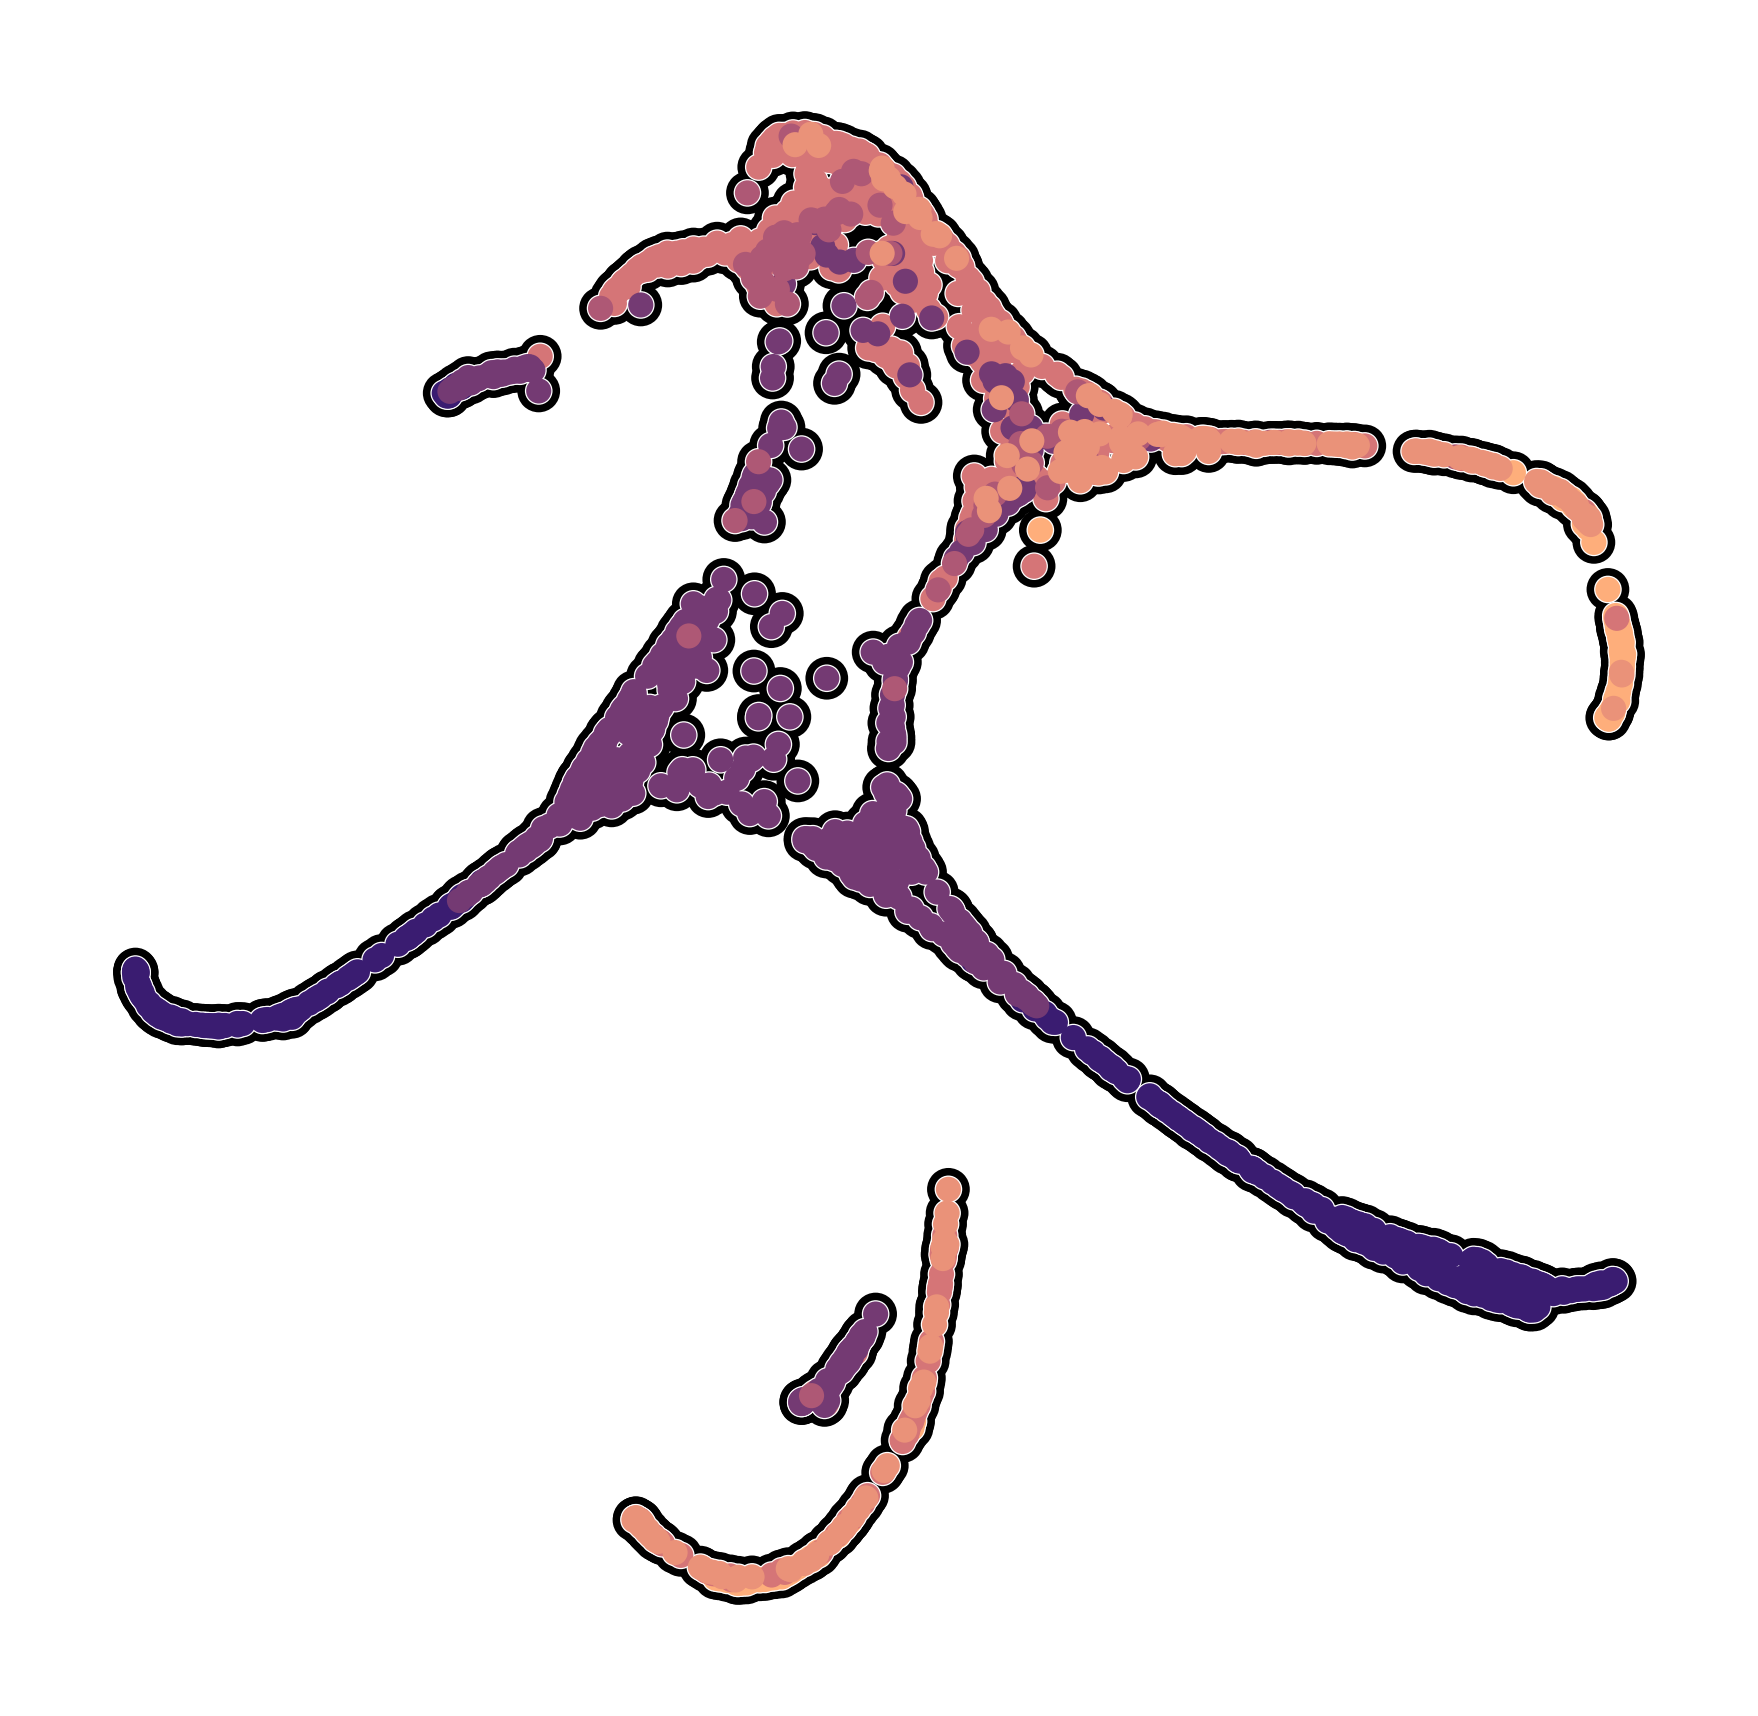

In [4]:
scv.pl.draw_graph(adata,color="devtime",
                 legend_loc="none",add_outline=True,title="",dpi=300,
                 save="devtime.pdf")

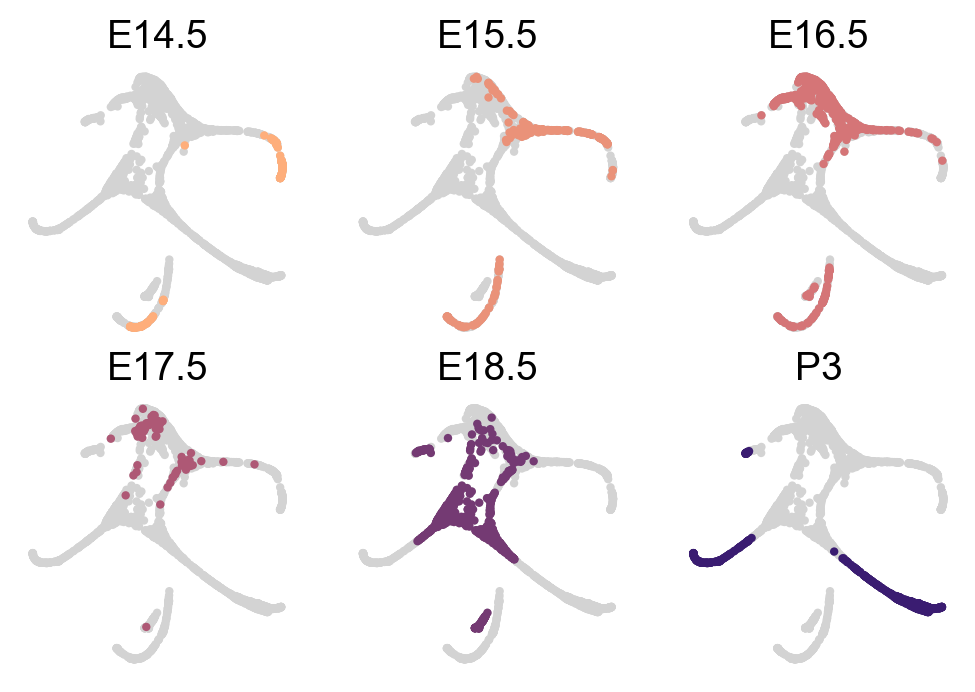

In [5]:
fig,axs=plt.subplots(2,3,figsize=(6,4))
axs=axs.ravel()
for i,d in enumerate(adata.obs.devtime.cat.categories):
    scv.pl.draw_graph(adata,color="devtime",groups=[d],title="",legend_loc="none",ax=axs[i],show=False)
    axs[i].set_title(d,fontsize=14)
plt.savefig("figures/devtime_sep.pdf",bbox_inches="tight",dpi=300)

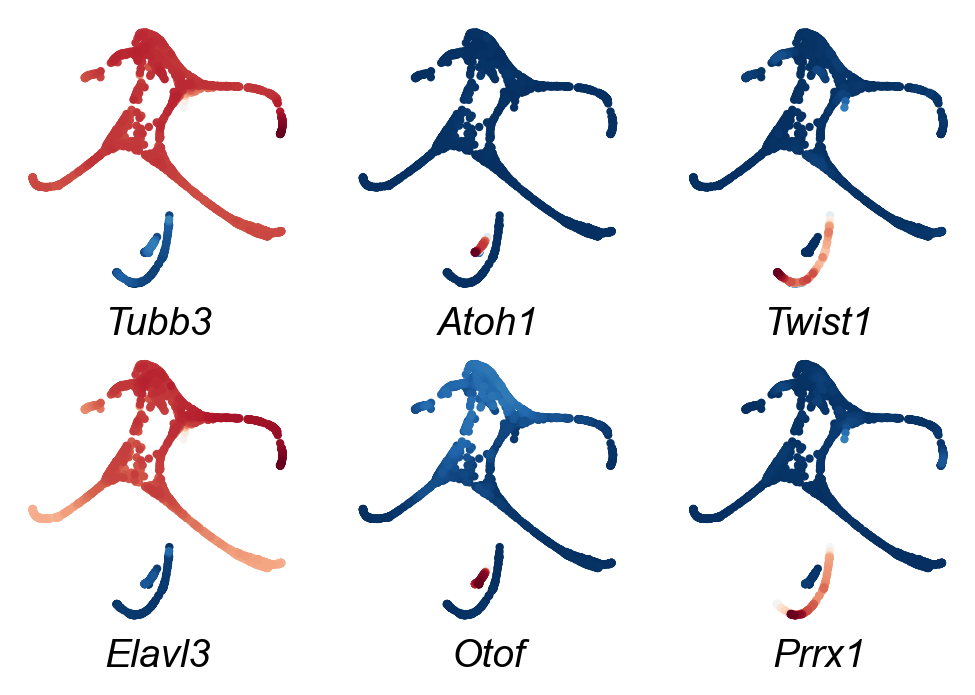

In [6]:
fig,axs=plt.subplots(2,3,figsize=(6,4))
axs=axs.ravel()
for i,d in enumerate(["Tubb3","Atoh1","Twist1","Elavl3","Otof","Prrx1"]):
    scv.pl.draw_graph(adata,color=d,cmap="RdBu_r",layer="palantir_imp",title="",colorbar=False,ax=axs[i],show=False)
    axs[i].set_xlabel(d,style='italic',fontsize=14)
plt.savefig("figures/markers_main.pdf",bbox_inches="tight",dpi=300)

In [7]:
sc.tl.rank_genes_groups(adata,"leiden",method="wilcoxon")

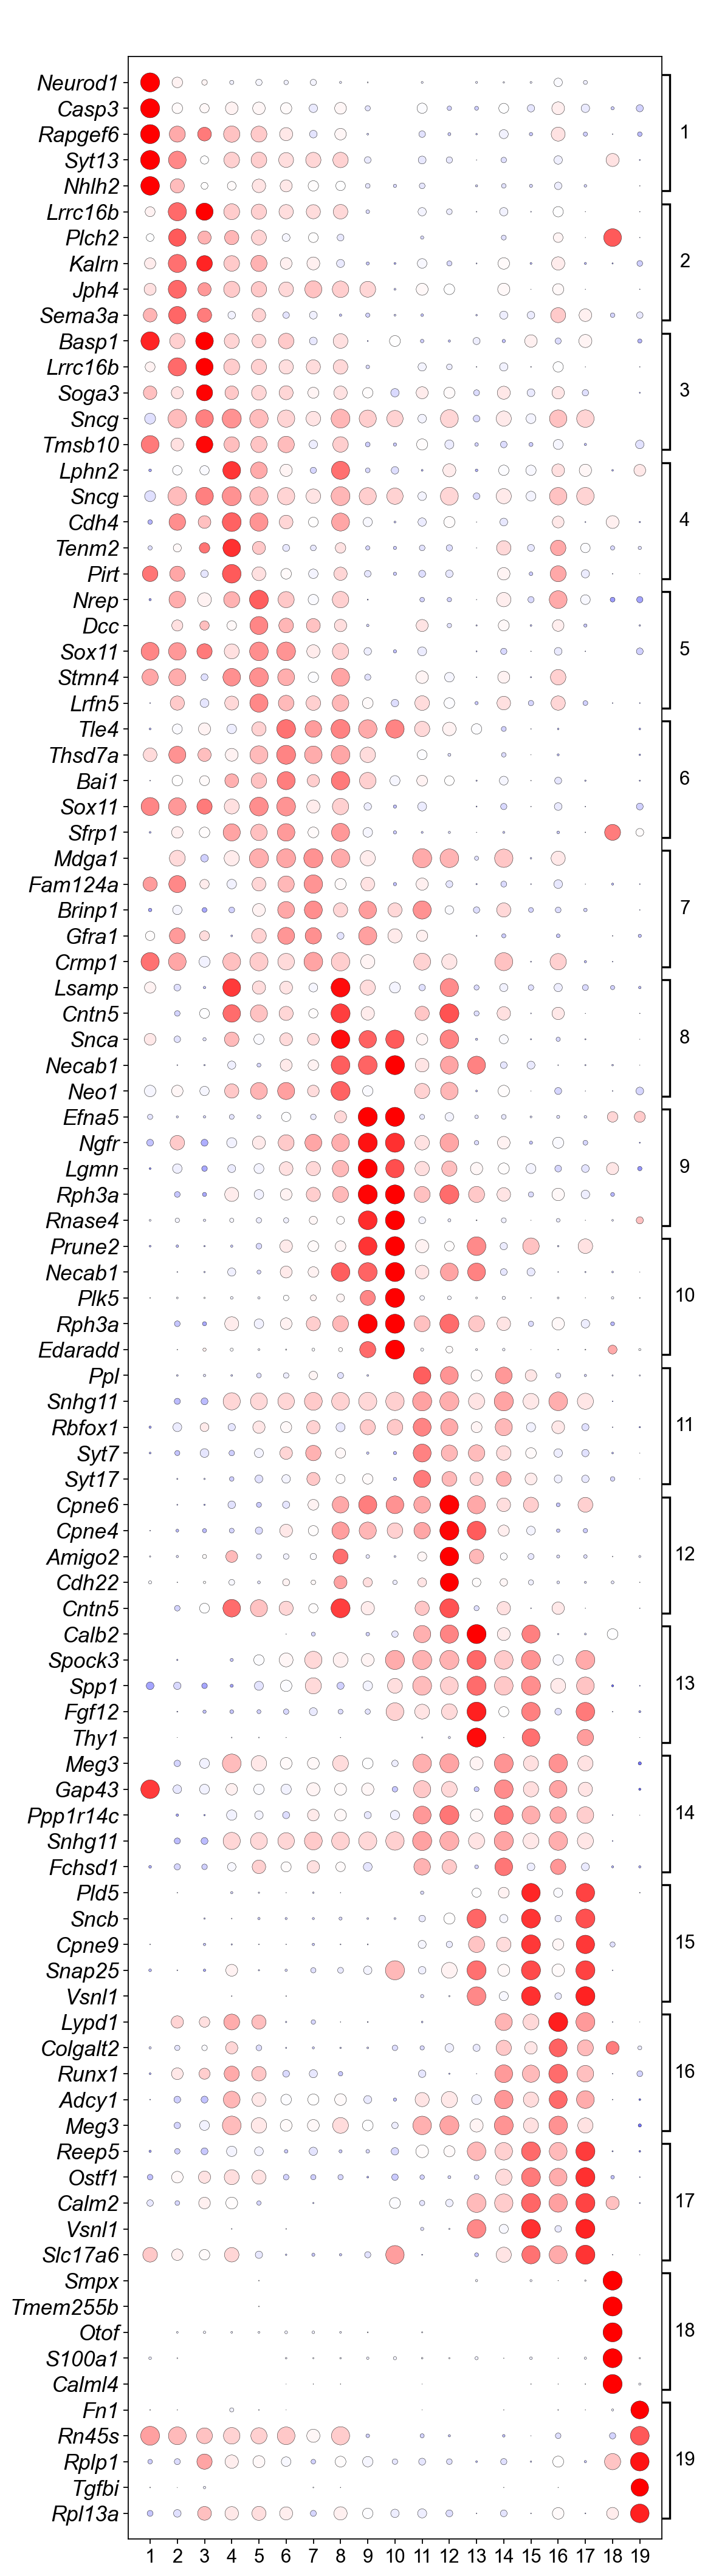

In [8]:
sc.set_figure_params()
ax=sc.pl.rank_genes_groups_dotplot(adata,use_raw=False,vmin=-2.5,vmax=2.5,n_genes=5,swap_axes=True,
                                   dendrogram=False,colorbar_title="mean z-score",
                                   var_group_rotation=0,show=False,layer="scaled",cmap="bwr")

main = ax["mainplot_ax"].get_position().bounds
groups=ax["gene_group_ax"].get_position().bounds
leg=ax["size_legend_ax"].get_position().bounds
tot_width=leg[0]+leg[2]
toadd=tot_width-groups[0]

ax["size_legend_ax"].remove()
ax["color_legend_ax"].remove()
ax["gene_group_ax"].set_position([groups[0]+toadd,groups[1],groups[2],groups[3]])
ax["mainplot_ax"].set_position([main[0],main[1],main[2]+toadd,main[3]])
ax["mainplot_ax"].figure.set_figwidth(ax["mainplot_ax"].figure.get_figwidth()-1.5)
plt.setp(ax['mainplot_ax'].get_yticklabels(),fontsize=16, rotation=0, ha="right", rotation_mode="anchor",style="italic");
plt.setp(ax['mainplot_ax'].get_xticklabels(),fontsize=14, rotation=0);
plt.setp(ax['mainplot_ax'].get_xticklabels(),fontsize=14, rotation=0);
plt.setp(ax["gene_group_ax"].texts,fontsize=14, rotation=0,ha="center");
plt.savefig("figures/dotplot.pdf",bbox_inches='tight')

In [9]:
import numpy as np
def make_dots(ax):
    dot_max=1
    dot_min=0
    diff = dot_max - dot_min
    if 0.3 < diff <= 0.6:
        step = 0.1
    elif diff <= 0.3:
        step = 0.05
    else:
        step = 0.2
    # a descending range that is afterwards inverted is used
    # to guarantee that dot_max is in the legend.
    size_range = np.arange(dot_max, dot_min, step * -1)[::-1]
    if dot_min != 0 or dot_max != 1:
        dot_range = dot_max - dot_min
        size_values = (size_range - dot_min) / dot_range
    else:
        size_values = size_range

    size = size_values ** 1.5
    size = size * (200.0)

    # plot size bar
    ax.scatter(
        np.arange(len(size)) + 0.5,
        np.repeat(0, len(size)),
        s=size,
        color='gray',
        edgecolor='black',
        linewidth=.2,
        zorder=100,
    )
    ax.set_xticks(np.arange(len(size)) + 0.5)
    labels = [
        "{}".format(np.round((x * 100), decimals=0).astype(int)) for x in size_range
    ]
    ax.set_xticklabels(labels, fontsize='small')

    # remove y ticks and labels
    ax.tick_params(
        axis='y', left=False, labelleft=False, labelright=False
    )

    # remove surrounding lines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(False)

    ymax = ax.get_ylim()[1]
    ax.set_ylim(-.2, 2)
    ax.set_title('Fraction of cells\nin group (%)', y=ymax+.1, size='small')

    xmin, xmax = ax.get_xlim()
    ax.set_xlim(xmin - 0.15, xmax + 0.5)

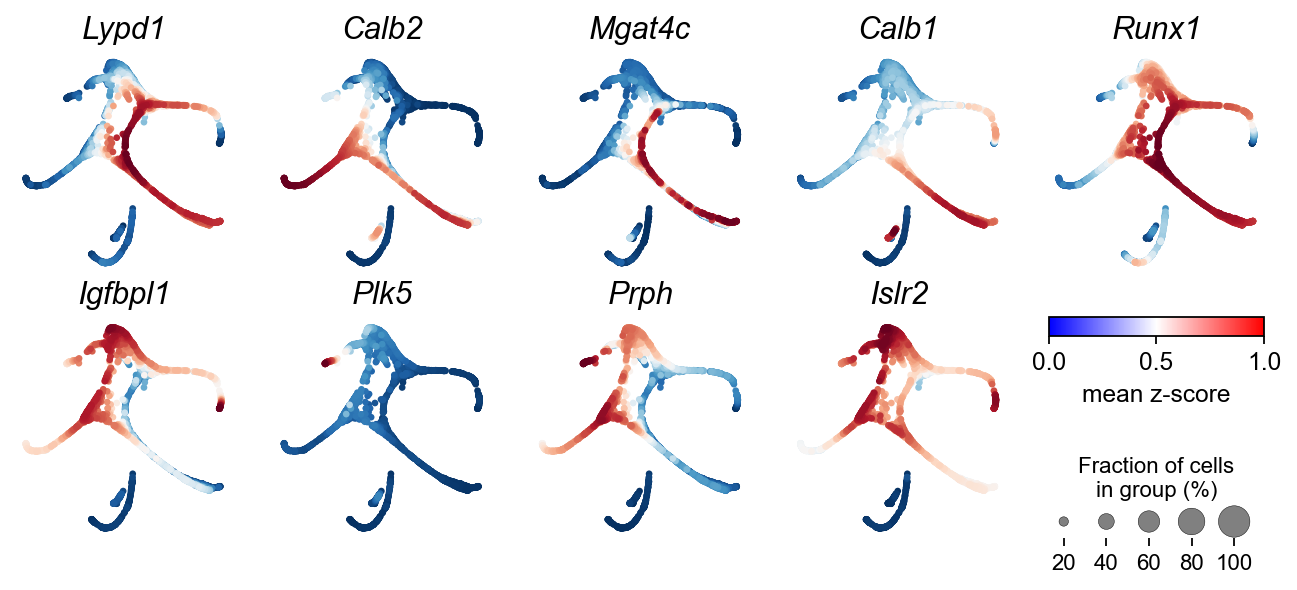

In [10]:
from matplotlib import cm
import matplotlib
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(10,4))
gs0 = gridspec.GridSpec(2, 5, figure=fig)

scv.set_figure_params(figsize=(3.5,3.5))


markers=["Lypd1","Calb2","Mgat4c","Calb1","Runx1","Igfbpl1","Plk5","Prph","Islr2"]
for i,d in enumerate(markers):
    ax= fig.add_subplot(gs0[i])
    scv.pl.draw_graph(adata,
                      color=d,
                      layer="palantir_imp",
                      cmap="RdBu_r",
                      title="",
                      colorbar=False,
                      ax=ax,
                      show=False)
    ax.set_title(d,style='italic',fontsize=14)

ax = fig.add_subplot(gs0[i+1])

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size = '10%', pad = 0.1)
fig.add_axes(cax)


cb1 = matplotlib.colorbar.ColorbarBase(cax, cmap=cm.bwr,
                                orientation='horizontal'  ,                    
                                ticks=None
                                )
#cb1.set_title("Dotplot legend")
cb1.set_ticklabels([-2,0,2])
cb1.set_label("mean z-score")
make_dots(ax)
plt.savefig("figures/markers2.pdf",bbox_inches="tight",dpi=300)

In [11]:
%%bash
cat<<EOF >fig1.tex
\documentclass{article}
\usepackage{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}

\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\usepackage{adjustbox}

\begin{document}
\setmainfont{Arial}

\noindent
\large 

\fontsize{9pt}{9pt}\selectfont

\adjustbox{valign=t}{\begin{minipage}[!ht]{0.65\textwidth}
\begin{minipage}[t]{.42\textwidth}
\raggedright \textbf{a} leiden clustering
\includegraphics[width=\textwidth]{figures/scvelo_leiden.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.58\textwidth}
\raggedright \textbf{b} main markers
\includegraphics[width=\textwidth]{figures/markers_main.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.42\textwidth}
\raggedright \textbf{c} developmental time
\includegraphics[width=\textwidth]{figures/scvelo_devtime.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.58\textwidth}
\raggedright \textbf{b} cell distribution of each developmental days
\includegraphics[width=\textwidth]{figures/devtime_sep.pdf}
\end{minipage}\hfill
\raggedright \textbf{g} validated markers
\includegraphics[width=\textwidth]{figures/markers2.pdf}
\end{minipage}\hfill}%
\adjustbox{valign=t}{\begin{minipage}[!ht]{0.3\textwidth}
\raggedright \textbf{e} top DE genes from leiden clustering
\includegraphics[width=\textwidth,trim={0 0 0 0.5in},clip]{figures/dotplot.pdf}
\end{minipage}\hfill}%
\clearpage
EOF
echo "\end{document}" >> fig1.tex

xelatex --shell-escape fig1.tex
rm fig1.tex
convert -flatten -density 300 fig1.pdf fig1.jpg

identify fig1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./fig1.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def))
(/usr/share/texlive/texmf-dist

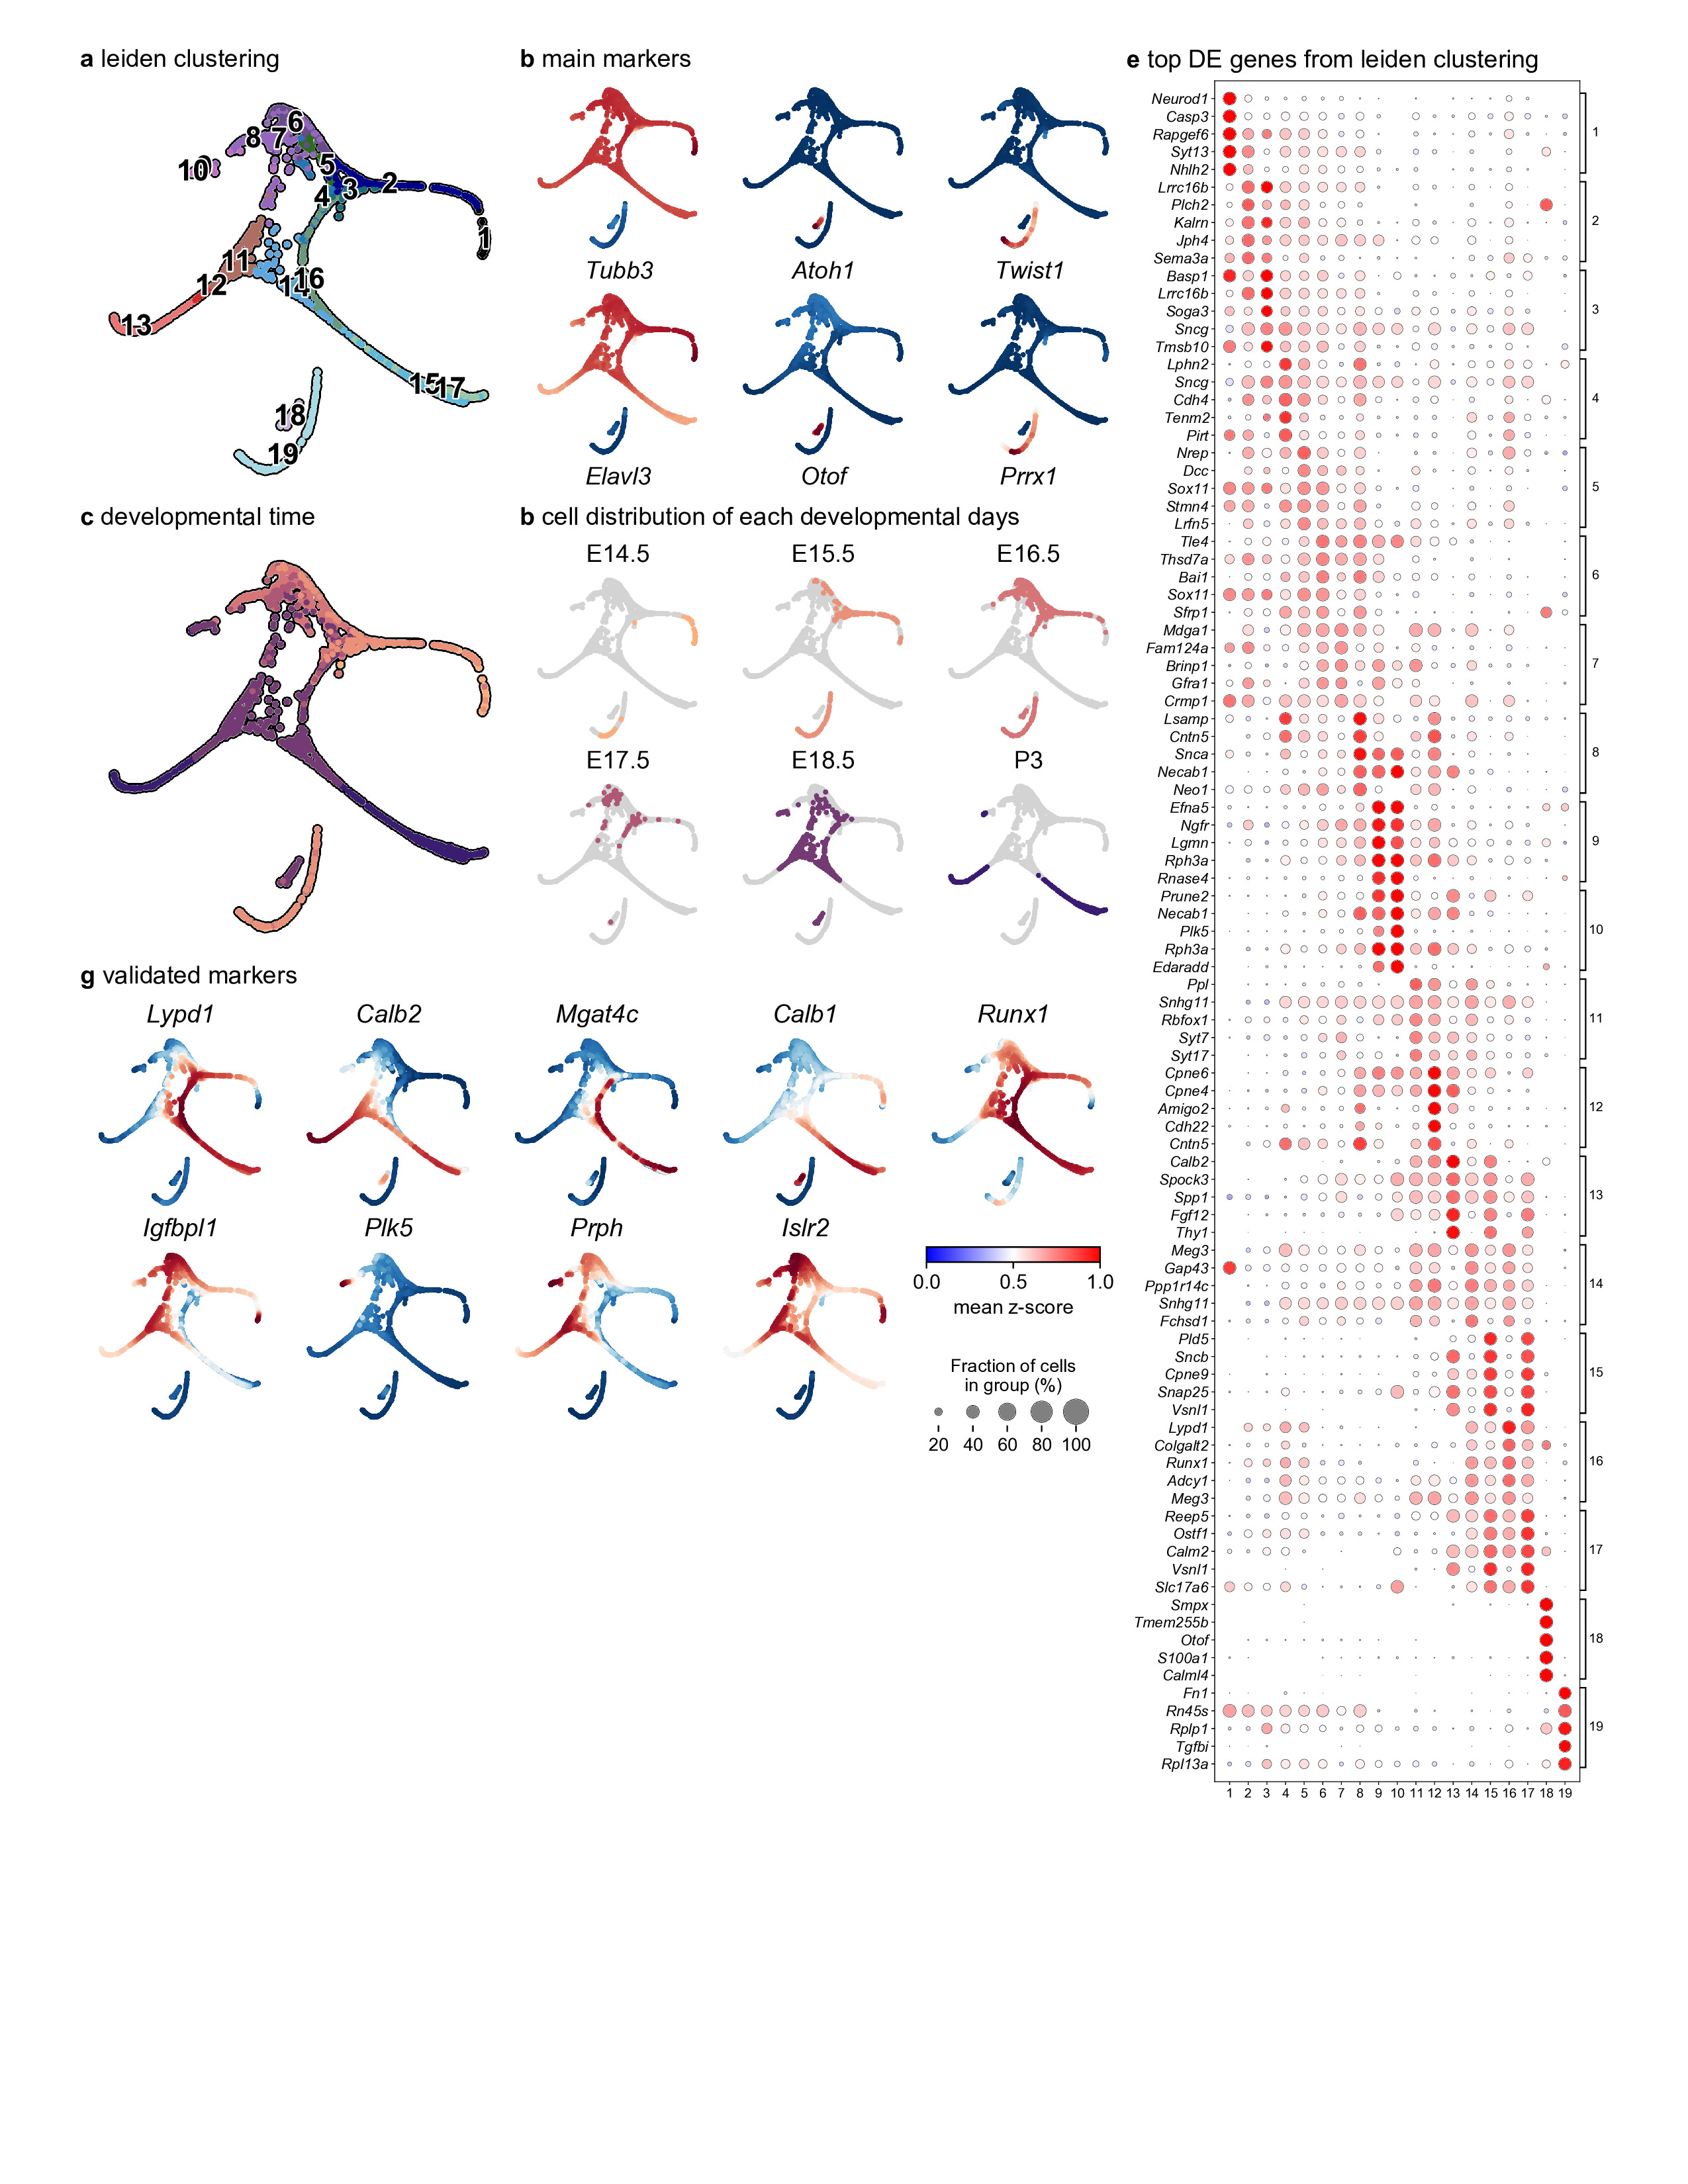

In [12]:
from IPython.display import Image
Image(filename='fig1.jpg') 